In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

In [3]:
df.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [4]:
df.isna().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

## Fazendo gráficos para visualizar a relação das variáveis

In [5]:
for columns in df.columns:
    if df[columns].dtype == 'object':
        print(columns)

track_id
artists
album_name
track_name
track_genre


C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\1561627513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_genre', y='popularity_target', data=df, palette='viridis')


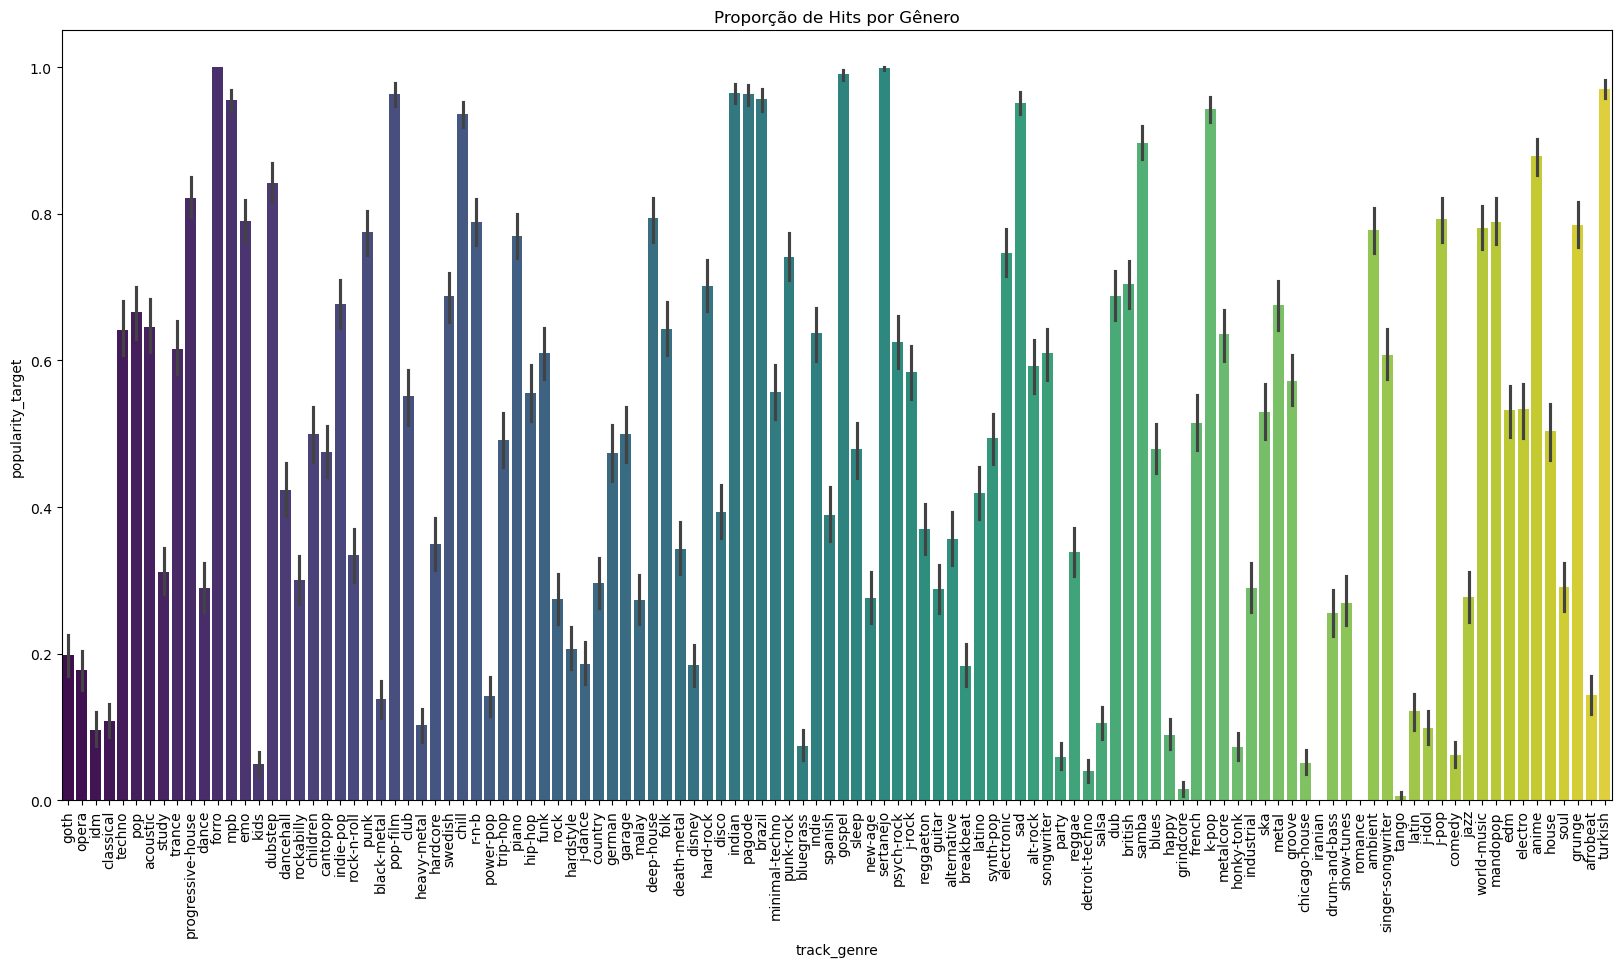

In [6]:
plt.figure(figsize=(20, 10))
sns.barplot(x='track_genre', y='popularity_target', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Proporção de Hits por Gênero')
plt.show()


C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\2939142123.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hits_por_intervalo_cumulative = df[df['popularity_target'] == 1].groupby('duration_range_cumulative').size().reset_index(name='hits')
C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\2939142123.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_range_cumulative', y='hits', data=hits_por_intervalo_cumulative, palette='viridis')


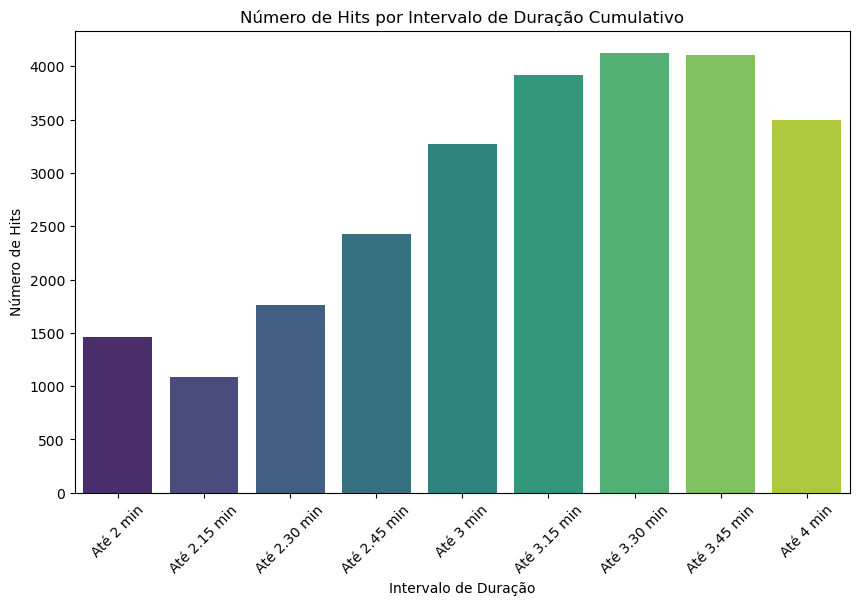

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir os interevalos (bins) para a duração em ms de forma cumulativa
bins = [0, 120000, 135000, 150000, 165000, 180000, 195000, 210000, 225000, 240000]  # Intervals for music durations
labels = ['Até 2 min', 'Até 2.15 min', 'Até 2.30 min', 'Até 2.45 min', 'Até 3 min', 'Até 3.15 min', 'Até 3.30 min', 'Até 3.45 min', 'Até 4 min']

# Criar uma nova coluna com os intervalos de duração cumulativos
df['duration_range_cumulative'] = pd.cut(df['duration_ms'], bins=bins, labels=labels)

# Contar o número de hits por intervalo de duração cumulativo
hits_por_intervalo_cumulative = df[df['popularity_target'] == 1].groupby('duration_range_cumulative').size().reset_index(name='hits')

# Criar o bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='duration_range_cumulative', y='hits', data=hits_por_intervalo_cumulative, palette='viridis')
plt.xlabel('Intervalo de Duração')
plt.ylabel('Número de Hits')
plt.title('Número de Hits por Intervalo de Duração Cumulativo')
plt.xticks(rotation=45)  # Adiciona uma rotação aos rótulos para melhor visualização
plt.show()



C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\208046787.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hits_por_intervalo_cumulative = df[df['popularity_target'] == 1].groupby('duration_range_cumulative').size().reset_index(name='hits')
C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\208046787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_range_cumulative', y='hits', data=hits_por_intervalo_cumulative, palette='viridis')


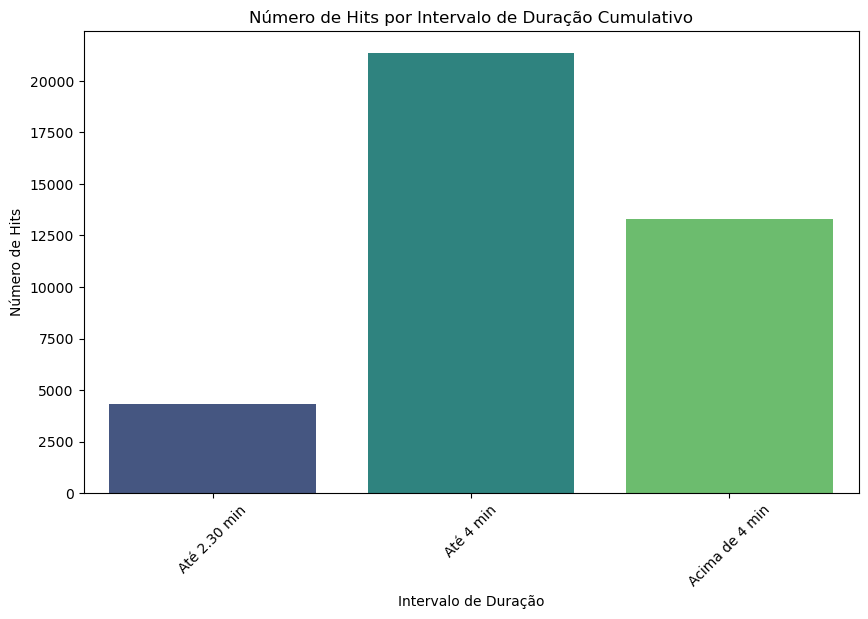

In [8]:
bins = [0, 150000, 240000, float('inf')]  # até 2:30, até 4:00, e acima de 4:00
labels = ['Até 2.30 min', 'Até 4 min', 'Acima de 4 min']

# Criar uma nova coluna com os intervalos de duração cumulativos
df['duration_range_cumulative'] = pd.cut(df['duration_ms'], bins=bins, labels=labels)

# Contar o número de hits por intervalo de duração cumulativo
hits_por_intervalo_cumulative = df[df['popularity_target'] == 1].groupby('duration_range_cumulative').size().reset_index(name='hits')

# Criar o bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='duration_range_cumulative', y='hits', data=hits_por_intervalo_cumulative, palette='viridis')
plt.xlabel('Intervalo de Duração')
plt.ylabel('Número de Hits')
plt.title('Número de Hits por Intervalo de Duração Cumulativo')
plt.xticks(rotation=45)  # Adiciona uma rotação aos rótulos para melhor visualização
plt.show()


df.drop(columns=['duration_range_cumulative'],inplace=True)

Hipotese 1: é possivel ver uma tendencia de haverem mais hits em musicas que estão no intervalo do meio do gráfico

In [9]:
df.keys()

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target'], dtype='object')

C:\Users\dudur\AppData\Local\Temp\ipykernel_21376\2905714636.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hits_por_speechiness = df_filtered.groupby('speechiness_range')['popularity_target'].size().reset_index(name='count')


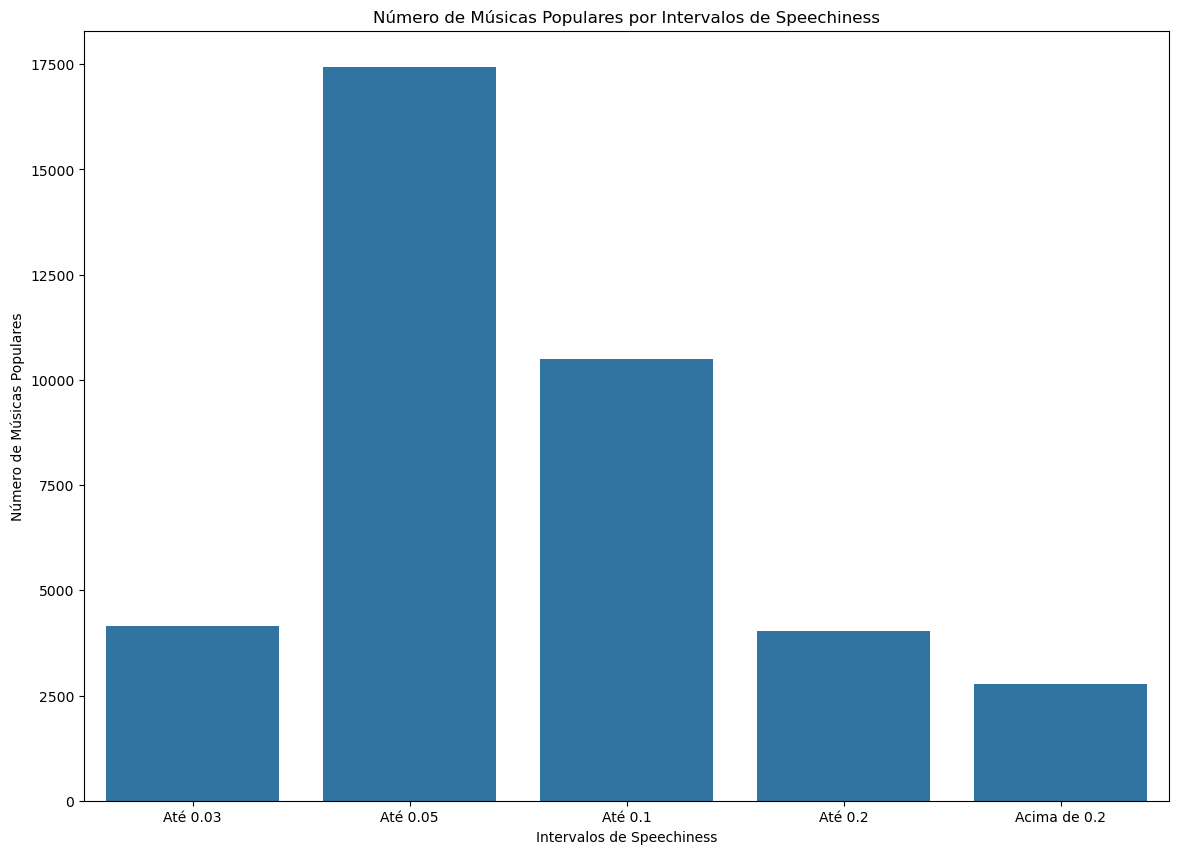

In [10]:
bins = [ 0,0.03,0.05, 0.1 ,0.2, float('inf')]  # até 2:30, até 4:00, e acima de 4:00
labels = ["Até 0.03","Até 0.05","Até 0.1",'Até 0.2','Acima de 0.2']

# Criar uma nova coluna com os intervalos de duração cumulativos
df['speechiness_range'] = pd.cut(df['speechiness'], bins=bins, labels=labels)

# Filtrar o DataFrame para considerar apenas os valores de popularity_target igual a 1
df_filtered = df[df['popularity_target'] == 1]

hits_por_speechiness = df_filtered.groupby('speechiness_range')['popularity_target'].size().reset_index(name='count')

plt.figure(figsize=(14, 10))
sns.barplot(data=hits_por_speechiness,x='speechiness_range',y='count')
plt.title('Número de Músicas Populares por Intervalos de Speechiness')
plt.xlabel('Intervalos de Speechiness')
plt.ylabel('Número de Músicas Populares')
plt.show()

df.drop(columns = 'speechiness_range',inplace=True)


Hipotese 2: Conseguimos analisar uma outra tendencia que tem intervalos específicos onde a speechiness influencia na probabilidade daquela musica ser hit ou não

In [11]:
hits_por_speechiness

,speechiness_range,count
0,Até 0.03,4149
1,Até 0.05,17426
2,Até 0.1,10491
3,Até 0.2,4037
4,Acima de 0.2,2778


In [12]:
df['speechiness'].value_counts()

speechiness
0.0322    271
0.0323    262
0.0324    260
0.0330    258
0.0299    247
         ... 
0.7210      1
0.6590      1
0.8450      1
0.7140      1
0.5510      1
Name: count, Length: 1454, dtype: int64

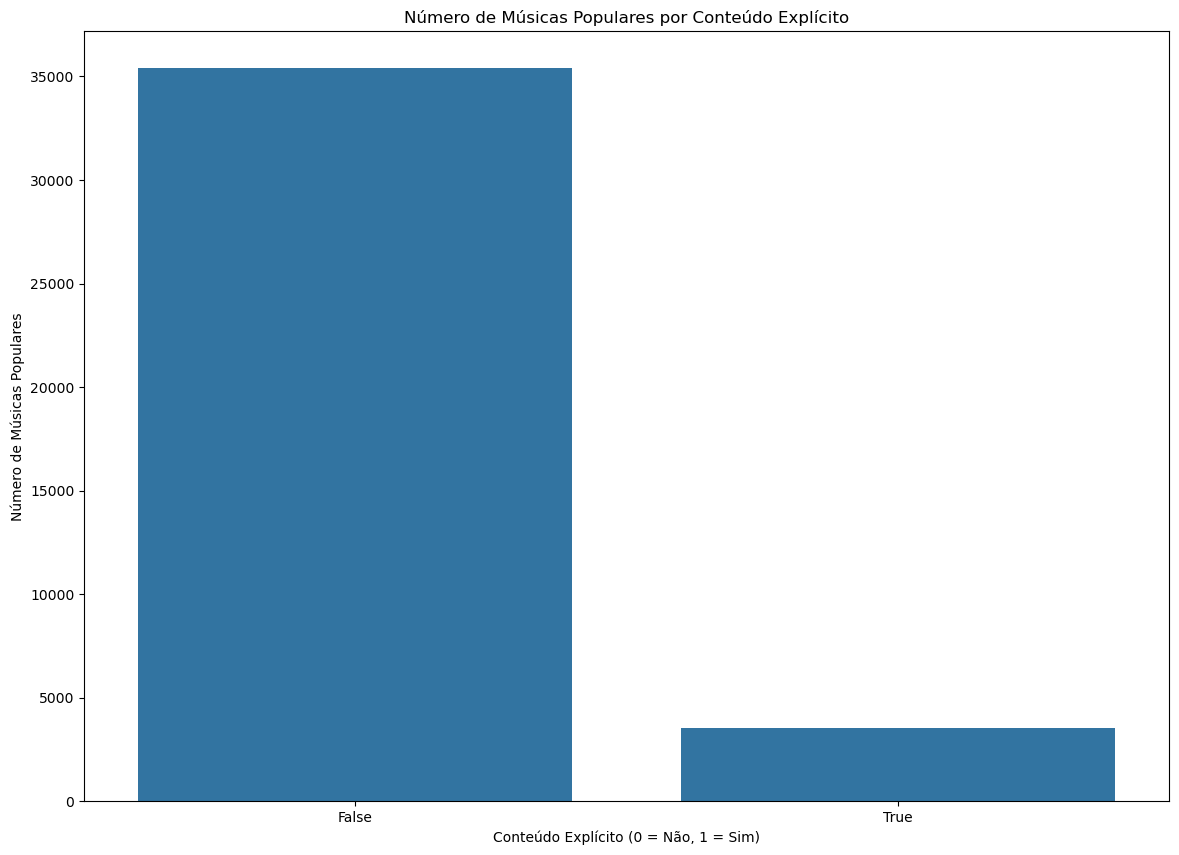

In [13]:

# Filtrar o DataFrame para considerar apenas os valores de popularity_target igual a 1
df_filtered = df[df['popularity_target'] == 1]

# Agrupar pelo campo 'explicit' e contar as ocorrências
df_grouped = df_filtered.groupby('explicit').size().reset_index(name='count')

# Criar o gráfico de barras
plt.figure(figsize=(14, 10))
sns.barplot(data=df_grouped, x='explicit', y='count')
plt.title('Número de Músicas Populares por Conteúdo Explícito')
plt.xlabel('Conteúdo Explícito (0 = Não, 1 = Sim)')
plt.ylabel('Número de Músicas Populares')
plt.show()


Hipotese 3 : Uma música ter conteúdo explicito surpreendentemente está relacionado ao hit, ou seja uma musica não ter conteúdo explícito pode dizer se aquela faixa tem maior probabilidade de ser hit ou não

## Criando novas colunas e fazendo o encoding das colunas

#### Numero de artistas por música

In [15]:
df_teste.fillna('a',inplace=True)

In [16]:
def artistcount(df):
    # Criar uma nova coluna para a contagem de artistas
    df['artist_count'] = df['artists'].str.split(';').apply(len)
artistcount(df)
artistcount(df_teste)


In [17]:
df.keys()

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target', 'artist_count'], dtype='object')

#### Liveness x Valence

In [18]:

def Liveness_Valence(df):
    df['Liveness_Valence'] = df['liveness'] * df['valence']
Liveness_Valence(df)
Liveness_Valence(df_teste)

#### Criando a coluna que relaciona o nivel de energia médio por Genero

In [19]:
def Energy_Genre(df):
    Energy_Genre = df.groupby('track_genre')['energy'].mean().reset_index(name='Energy_Genre')
    df = df.merge(Energy_Genre,on = 'track_genre',how='left')
Energy_Genre(df)
Energy_Genre(df_teste)


### Dando drop nas colunas:


In [21]:
def drop(df):
    df.drop(columns=['album_name','mode','explicit','artists','track_id','key','track_name'],inplace=True)
drop(df_teste)
drop(df)

### Músicas com alta "dançabilidade" e positividade (valence)

In [22]:
def dancabilidade(df):
    df['Valence_Danceability'] = df['valence'] * df['danceability']
dancabilidade(df)
dancabilidade(df_teste)

### Fazendo a clusterização das colunas usando o k means:

In [23]:
# df.keys()

In [24]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Selecionar as features relevantes para clusterização (sem a coluna popularity_target)
# features = ['energy', 'danceability', 'valence', 'speechiness', 'tempo', 'liveness',"Energy_Genre"]  # Adicione outras features se necessário
# X = df[features]

# # Normalizar os dados para que todas as features tenham a mesma escala
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Escolher o número de clusters
# n_clusters = 4  # Defina o número de clusters desejado

# # Instanciar o modelo KMeans
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Ajustar o modelo aos dados
# df['cluster'] = kmeans.fit_predict(X_scaled)

# # Visualizar a distribuição dos clusters
# plt.figure(figsize=(10, 6))
# sns.countplot(x='cluster', data=df, palette='viridis')
# plt.title('Distribuição de Músicas por Cluster')
# plt.show()

# plt.figure(figsize=(20, 12))
# sns.countplot(x='cluster', hue='track_genre', data=df, palette='viridis')
# plt.title('Distribuição de Gêneros por Cluster')
# plt.xticks(rotation=90)
# plt.legend(title='Gêneros', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)  # Legenda com 2 colunas
# plt.tight_layout()
# plt.show()


# # Exibir os centros dos clusters
# cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# print("Centros dos clusters:\n", cluster_centers)


### Fazendo a relação energy times loudness

In [25]:
def Energy_times_loudness(df):
    df['Energy_times_loudness'] = df['energy'] * df['loudness']
    df.drop(columns=['energy','loudness'],inplace=True)
Energy_times_loudness(df)
Energy_times_loudness(df_teste)

### Fazendo o encoding 

In [26]:
def enconding(df):
    label_encoder = LabelEncoder()
    # Aplicar o Label Encoding na coluna 'track_genre'
    df['track_genre'] = label_encoder.fit_transform(df['track_genre'])
enconding(df)
enconding(df_teste)



In [27]:
# from sklearn.model_selection import KFold

# def leave_one_out_encoding(train_series, target_series):
#     target_mean = pd.Series(index=train_series.index, dtype=float)
    
#     # Calcular a soma e o número de ocorrências para cada categoria
#     sum_per_category = target_series.groupby(train_series).sum()
#     count_per_category = target_series.groupby(train_series).count()
    
#     # Para cada observação, calcular a média excluindo a própria observação (leave-one-out)
#     for category in train_series.unique():
#         mask = train_series == category
#         target_mean[mask] = (sum_per_category[category] - target_series[mask]) / (count_per_category[category] - 1 + 1e-5)  # Evitar divisão por zero
    
#     return target_mean

# # Aplicar Leave-One-Out Encoding
# df['track_genre_encoded'] = leave_one_out_encoding(df['track_genre'], df['popularity_target'])

# # Para o conjunto de teste, utilizar a média global calculada no conjunto de treino
# global_means = df.groupby('track_genre')['track_genre_encoded'].mean()
# df_teste['track_genre_encoded'] = df_teste['track_genre'].map(global_means)

# # Preencher valores ausentes (gêneros que aparecem no teste mas não no treino) com a média global
# df_teste['track_genre_encoded'].fillna(global_means.mean(), inplace=True)



In [28]:
# df.drop(columns='track_genre',inplace=True)
# df_teste.drop(columns='track_genre',inplace=True)

In [29]:
df.dtypes

track_unique_id            int64
duration_ms                int64
danceability             float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature             int64
track_genre                int32
popularity_target          int64
artist_count               int64
Liveness_Valence         float64
total_musicas_genero       int64
total_hits_genero        float64
Genero/HitEm%            float64
Valence_Danceability     float64
Energy_times_loudness    float64
dtype: object

In [30]:
df.keys()

Index(['track_unique_id', 'duration_ms', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target', 'artist_count', 'Liveness_Valence', 'total_musicas_genero', 'total_hits_genero', 'Genero/HitEm%', 'Valence_Danceability', 'Energy_times_loudness'], dtype='object')

## Preparando para treinar os modelos

### Matriz de correlação

In [31]:
df.keys()

Index(['track_unique_id', 'duration_ms', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target', 'artist_count', 'Liveness_Valence', 'total_musicas_genero', 'total_hits_genero', 'Genero/HitEm%', 'Valence_Danceability', 'Energy_times_loudness'], dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['popularity_target'])
y = df['popularity_target']

In [33]:
X.columns

Index(['track_unique_id', 'duration_ms', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'artist_count', 'Liveness_Valence', 'total_musicas_genero', 'total_hits_genero', 'Genero/HitEm%', 'Valence_Danceability', 'Energy_times_loudness'], dtype='object')

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# # Separar a coluna track_unique_id
# track_unique_id_test = df_teste['track_unique_id']

# # Remover track_unique_id para aplicar o scaler apenas nas colunas numéricas
# df_teste_scaled = df_teste.drop(columns=['track_unique_id'])

# # Aplicar o scaler no conjunto de treino e teste
# scaler = StandardScaler()
# df_teste_scaled = scaler.fit_transform(df_teste_scaled)

# # Converter de volta para DataFrame para adicionar track_unique_id
# df_teste_scaled = pd.DataFrame(df_teste_scaled, columns=df_teste.drop(columns=['track_unique_id']).columns)

# # Adicionar track_unique_id de volta ao DataFrame escalonado
# df_teste_scaled['track_unique_id'] = track_unique_id_test

## Treinando os modelos

### Xgboost

In [36]:
# Corrigindo a definição do modelo
best_model = xgb.XGBClassifier(
    max_depth=10, 
    learning_rate=0.07973799222210452, 
    n_estimators=1547, 
    subsample=0.9574125550682205, 
    colsample_bytree=0.7245285019120112, 
    gamma=0.09887625617289046, 
    reg_alpha=0.002317008095691573, 
    reg_lambda=0.3129941890195362, 
    scale_pos_weight=1.1602114236353172, 
    use_label_encoder=False
)

# Treinando o modelo
best_model.fit(X_train, y_train)


c:\Users\dudur\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7245285019120112, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.09887625617289046,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07973799222210452,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1547, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8510651629072682


In [38]:
# import shap
# import matplotlib.pyplot as plt

# # Carregar o explainer SHAP para o modelo XGBoost
# explainer = shap.Explainer(best_model)

# # Calcular os valores SHAP para o conjunto de teste
# shap_values = explainer(X_test)

# # Plotar o gráfico de valores SHAP (gráfico de dependência)
# shap.summary_plot(shap_values, X_test, plot_type="dot")


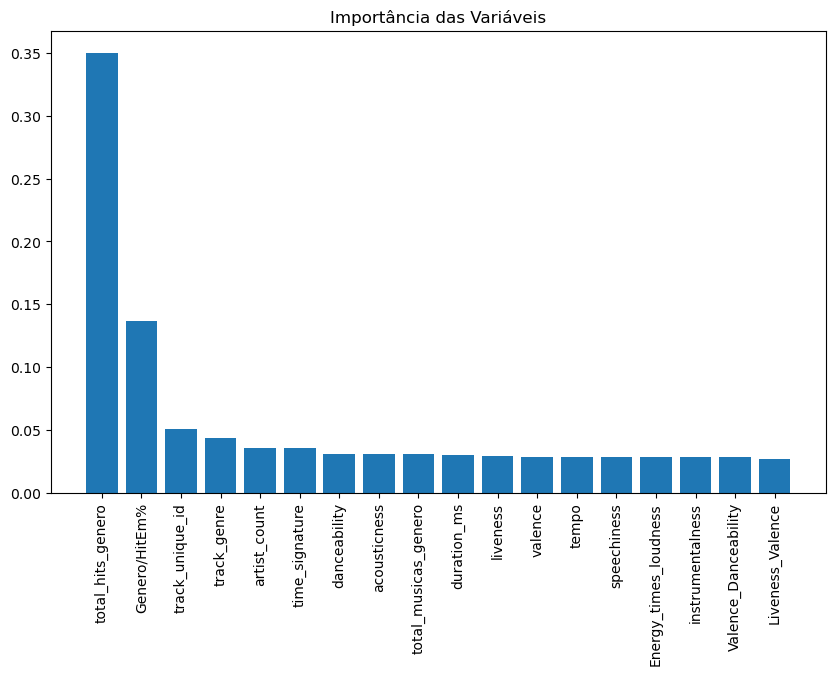

In [39]:
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.show()

### Cross Validation

In [40]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# # Configurar a validação cruzada estratificada
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Avaliar o modelo com validação cruzada
# cv_scores = cross_val_score(cat_model, X, y, cv=skf, scoring='accuracy')
# print(f"Acurácia média: {np.mean(cv_scores)}")


### Random Forest

Acurácia do Random Forest: 0.818
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      8247
           1       0.80      0.83      0.82      7713

    accuracy                           0.82     15960
   macro avg       0.82      0.82      0.82     15960
weighted avg       0.82      0.82      0.82     15960



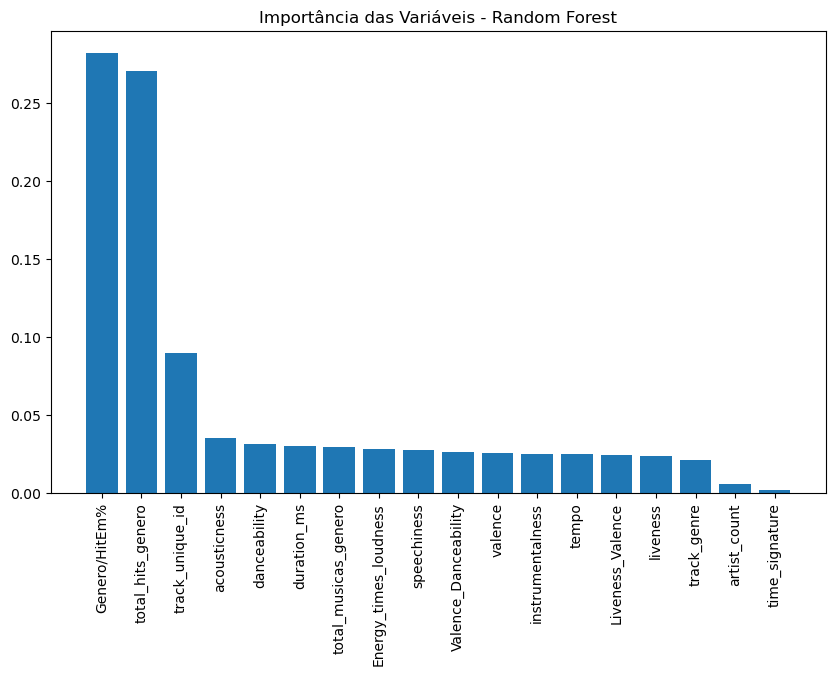

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=500,          # Número de árvores na floresta
    max_depth=15,              # Profundidade máxima de cada árvore
    min_samples_split=5,       # Número mínimo de amostras requeridas para dividir um nó
    min_samples_leaf=4,        # Número mínimo de amostras em um nó folha
    max_features='sqrt',       # Número de features consideradas para encontrar a melhor divisão
    bootstrap=True,            # Amostras com substituição (padrão)
    random_state=42,           # Para garantir reprodutibilidade
    class_weight='balanced',   # Para lidar com classes desbalanceadas
    n_jobs=-1                  # Usar todos os núcleos disponíveis para treinamento
)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.3f}")


# Exibir o relatório de classificação
print(classification_report(y_test, y_pred_rf))

# Importância das variáveis
importances_rf = rf_model.feature_importances_
sorted_indices_rf = np.argsort(importances_rf)[::-1]

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis - Random Forest')
plt.bar(range(X_train.shape[1]), importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_rf], rotation=90)
plt.show()

## Colocando o modelo em produção fazendo as previsões

In [42]:
df_teste.shape

(23915510, 16)

In [43]:
# Alinhar as colunas do conjunto de treino e teste
df_teste = df_teste.reindex(columns=df.columns, fill_value=0)

In [44]:
X.keys()

Index(['track_unique_id', 'duration_ms', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'artist_count', 'Liveness_Valence', 'total_musicas_genero', 'total_hits_genero', 'Genero/HitEm%', 'Valence_Danceability', 'Energy_times_loudness'], dtype='object')

In [45]:
df_teste.shape

(23915510, 19)

In [46]:
df_teste.head()

,track_unique_id,duration_ms,danceability,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target,artist_count,Liveness_Valence,total_musicas_genero,total_hits_genero,Genero/HitEm%,Valence_Danceability,Energy_times_loudness
0,113186,440247,0.369,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,113,0,1,0.008202,0,0,78.05,0.017195,-4.176432
1,113186,440247,0.369,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,113,0,1,0.008202,0,0,78.05,0.017195,-4.176432
2,113186,440247,0.369,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,113,0,1,0.008202,0,0,78.05,0.017195,-4.176432
3,113186,440247,0.369,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,113,0,1,0.008202,0,0,78.05,0.017195,-4.176432
4,113186,440247,0.369,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,113,0,1,0.008202,0,0,78.05,0.017195,-4.176432


In [47]:
X_train.head()

,track_unique_id,duration_ms,danceability,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist_count,Liveness_Valence,total_musicas_genero,total_hits_genero,Genero/HitEm%,Valence_Danceability,Energy_times_loudness
23491,113962,297000,0.383,0.0468,0.1010,0.00000,0.2290,0.260,146.052,4,113,2,0.059540,729,569.0,78.05,0.099580,-4.002768
72887,45256,287626,0.608,0.0409,0.4690,0.90900,0.0651,0.365,77.937,4,45,1,0.023762,712,205.0,28.79,0.221920,-5.708064
54394,16967,80699,0.537,0.0605,0.9910,0.84800,0.1190,0.890,124.812,4,16,2,0.105910,698,76.0,10.89,0.477930,-2.853510
43696,87126,267120,0.582,0.0295,0.0819,0.00119,0.9020,0.345,109.934,4,87,2,0.311190,713,562.0,78.82,0.200790,-3.705654
45363,94407,156983,0.677,0.0448,0.9480,0.00001,0.0926,0.318,103.986,4,94,2,0.029447,737,701.0,95.12,0.215286,-4.330240


In [48]:
df_teste = df_teste[X_train.columns]  # Manter apenas as colunas que estão no conjunto de treino

In [49]:
# def preparar_envio(modelo, df_teste, arquivo_saida='submission.csv'):
#     # Fazer previsões
#     previsoes = modelo.predict(df_teste)

#     # Adicionar as previsões ao DataFrame de teste
#     df_teste['popularity_target'] = previsoes

#     # Selecionar colunas necessárias para o envio
#     df_envio = df_teste[['track_unique_id', 'popularity_target']]

#     # Salvar o arquivo no formato correto
#     df_envio.to_csv(arquivo_saida, index=False)
#     print(f"Envio salvo como {arquivo_saida}.")

# # Usar a função para preparar o envio
# preparar_envio(mlp, df_teste)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Definir o Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_model),  # Modelo XGBoost
        ('rf', rf_model),  # Modelo Random Forest
    ],
    final_estimator=LogisticRegression(),  # Meta-modelo
    cv=5  # Validação cruzada
)

# Treinar o modelo de ensemble
stacking_model.fit(X_train, y_train)

# Fazer previsões usando o modelo de ensemble
predictions_ensemble = stacking_model.predict(df_teste)

# Adicionar as previsões ao DataFrame de teste
df_teste['popularity_target'] = predictions_ensemble

# Salvar o resultado
df_envio = df_teste[['track_unique_id', 'popularity_target']]
df_envio.to_csv('submission_ensemble.csv', index=False)
print("Envio salvo como submission_ensemble.csv.")


c:\Users\dudur\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dudur\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dudur\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:41:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dudur\anaconda3\Lib\site-packages\

Envio salvo como submission_ensemble.csv.
